In [24]:
import ujson as json, re

def extract_answer(response):
    # extract everything between ```python and ```
    return response.split("```python")[1].split("```")[0]

all_logs = {}
with open("logs/logs.jsonl", "r") as f:
    for line in f:
        log = json.loads(line)
        model_name = log["model_name"]
        if model_name not in all_logs:
            all_logs[model_name] = []
        log["score"] = log["eval_result"]["score"]
        log["num_response_chars"] = len(log["response"])
        log["num_response_words"] = len(log["response"].split())
        log["num_response_lines"] = log["response"].count("\n")
        log["answer"] = extract_answer(log["response"])
        log["num_answer_chars"] = len(log["answer"])
        log["num_answer_words"] = len(log["answer"].split())
        log["num_answer_lines"] = log["answer"].count("\n")

        # the answer with all the comments stripped
        # Remove both single-line (# ...) and multi-line ('''...''' or """...""") comments
        log["answer2"] = re.sub(r'(\"\"\".*?\"\"\"|\'\'\'.*?\'\'\'|#.*?$)', '', log["answer"], flags=re.DOTALL | re.MULTILINE)
        log["answer2"] = "\n".join([line for line in log["answer2"].split("\n") if line.strip()]) # remove any empty lines

        log["num_answer2_chars"] = len(log["answer2"])
        log["num_answer2_words"] = len(log["answer2"].split())
        log["num_answer2_lines"] = log["answer2"].count("\n")
        # all_logs.append(log)
        all_logs[model_name].append(log)

for model_name in all_logs:
    print(model_name.ljust(20), len(all_logs[model_name]))

models = list(all_logs.keys())


gs-microsoft/phi-4   200000
t-gpt-4o-mini        200000
gs-Qwen/Qwen3-8B     11
t-gpt-4o             9929
t-gpt-5-chat         16853


,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2,answers2_mode
0,sharded-livecodebench/2847,2000,0.8435,534.4520,59.2705,18.7965,504.3295,54.0470,18.6030,429.0095,43.4220,13.2360,81.85,81.10,68.10,0.0505
1,sharded-HumanEval/139,2000,0.8250,239.8290,33.6020,10.1445,225.9275,31.3165,10.0905,185.6385,25.8980,6.0775,25.15,24.85,15.15,0.2360
2,sharded-HumanEval/158,2000,0.8210,257.8070,28.1400,8.5500,245.8070,26.1400,8.5500,226.8450,24.3210,5.4365,52.65,52.65,43.60,0.0390
3,sharded-HumanEval/99,2000,0.7830,218.7605,31.3590,8.1505,206.4740,29.3130,8.1470,202.8690,29.0950,6.0455,35.35,35.20,33.95,0.1855
4,sharded-HumanEval/137,2000,0.7735,389.3915,44.0040,15.5825,377.3915,42.0040,15.5825,357.1865,39.8140,11.5940,87.25,87.25,77.80,0.0085
5,sharded-livecodebench/2883,2000,0.7630,932.9945,130.1495,26.9435,881.9580,121.9785,26.6190,636.2480,82.6505,17.9530,99.80,99.80,99.50,0.0025
6,sharded-livecodebench/2856,2000,0.7270,686.5485,71.5995,22.5890,644.9330,65.0180,22.3020,545.0490,53.3905,14.7380,95.50,95.20,88.15,0.0130
7,sharded-livecodebench/2866,2000,0.6975,653.8110,78.4870,21.6420,619.2565,72.9355,21.3580,564.0855,67.7225,15.2395,91.40,90.85,79.70,0.0150
8,sharded-HumanEval/76,2000,0.6675,176.2325,31.4050,8.4260,164.1930,29.4000,8.4250,152.0095,27.7895,6.1455,30.25,30.20,28.70,0.3840
9,sharded-livecodebench/2756,2000,0.5800,497.1175,64.5290,15.6515,475.2625,60.8895,15.5750,359.6170,43.3725,10.0505,84.25,83.85,67.20,0.0195


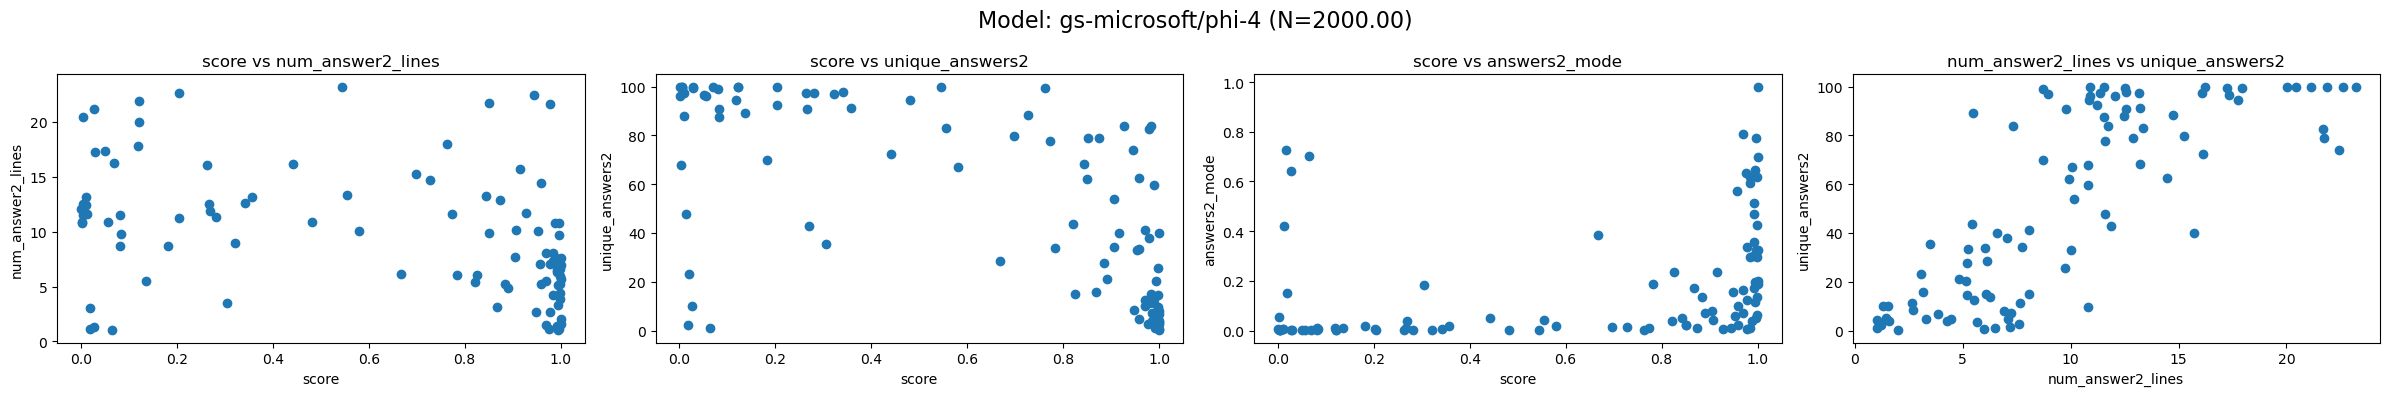

,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2,answers2_mode
0,sharded-livecodebench/2866,2000,0.9705,537.2255,64.0025,17.3740,525.2255,62.0025,17.3740,497.4580,59.9055,12.7095,54.85,54.85,35.30,0.1470
1,sharded-livecodebench/2873,2000,0.9655,578.8185,88.1970,22.8010,566.8185,86.1970,22.8010,499.8020,74.4785,16.1305,73.90,73.90,52.20,0.0725
2,sharded-livecodebench/2882,2000,0.9650,623.1255,111.0160,20.6880,611.1255,109.0160,20.6880,367.6990,65.4040,11.6055,100.00,100.00,51.50,0.0645
3,sharded-HumanEval/139,2000,0.9620,330.7100,49.0290,12.0880,318.7115,47.0295,12.0880,187.6965,28.0250,5.2500,4.05,4.05,2.95,0.5350
4,sharded-livecodebench/2883,2000,0.9510,836.9910,119.4580,22.6805,824.9910,117.4580,22.6805,581.2015,75.7415,15.6515,100.00,100.00,99.25,0.0020
5,sharded-HumanEval/118,2000,0.9500,326.3205,48.1025,10.1450,314.3205,46.1025,10.1450,292.2440,44.4355,6.1750,22.70,22.70,15.00,0.2245
6,sharded-HumanEval/39,2000,0.9480,446.9260,58.6525,19.3995,434.9260,56.6525,19.3995,411.8660,54.5995,14.6245,56.20,56.20,39.70,0.0440
7,sharded-HumanEval/138,2000,0.9405,316.1210,44.6400,9.5700,304.1210,42.6400,9.5700,76.5130,14.3630,1.8950,2.75,2.75,1.35,0.5515
8,sharded-HumanEval/59,2000,0.9145,456.6390,64.5410,18.4915,444.6390,62.5410,18.4915,283.3455,40.8090,10.4095,28.20,28.20,17.40,0.1760
9,sharded-livecodebench/2955,2000,0.9110,290.9670,38.5405,7.2280,278.9670,36.5405,7.2280,192.1810,22.6780,3.2635,60.10,60.10,18.20,0.1215


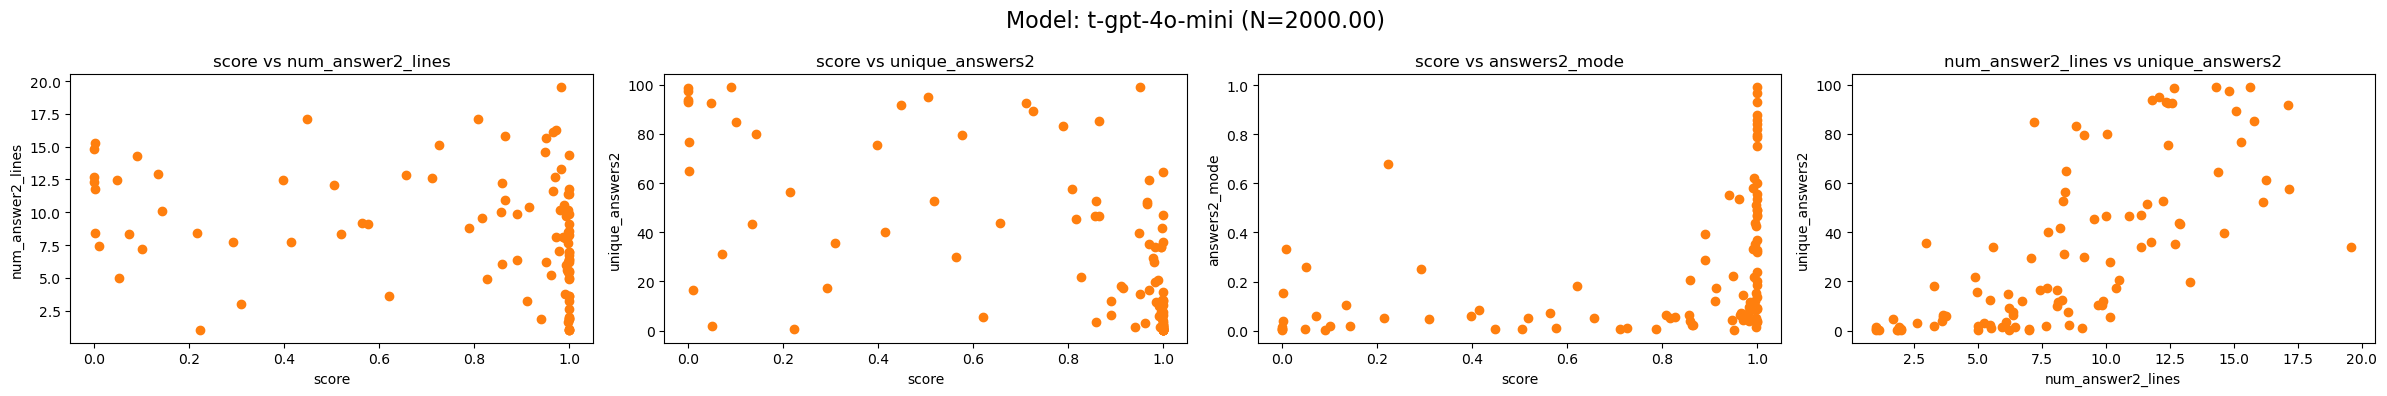

,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2,answers2_mode
0,sharded-HumanEval/7,1,1.0,3545.0,579.0,39.0,381.0,49.0,12.0,147.0,21.0,2.0,100.0,100.0,100.0,1.0
1,sharded-livecodebench/2727,1,1.0,3480.0,579.0,100.0,231.0,27.0,9.0,229.0,27.0,7.0,100.0,100.0,100.0,1.0
2,sharded-HumanEval/5,1,1.0,3673.0,615.0,82.0,458.0,56.0,18.0,259.0,27.0,8.0,100.0,100.0,100.0,1.0
3,sharded-HumanEval/17,1,1.0,3312.0,568.0,72.0,330.0,36.0,14.0,327.0,36.0,11.0,100.0,100.0,100.0,1.0
4,sharded-HumanEval/73,1,1.0,4207.0,780.0,90.0,158.0,23.0,8.0,156.0,23.0,6.0,100.0,100.0,100.0,1.0
5,sharded-HumanEval/105,1,1.0,4586.0,759.0,87.0,1079.0,171.0,28.0,289.0,40.0,5.0,100.0,100.0,100.0,1.0
6,sharded-HumanEval/138,1,1.0,3863.0,838.0,16.0,63.0,12.0,3.0,61.0,12.0,1.0,100.0,100.0,100.0,1.0
7,sharded-livecodebench/2819,1,1.0,6211.0,1137.0,125.0,200.0,28.0,7.0,198.0,28.0,5.0,100.0,100.0,100.0,1.0
8,sharded-HumanEval/139,1,1.0,5519.0,975.0,159.0,454.0,67.0,19.0,154.0,23.0,6.0,100.0,100.0,100.0,1.0
9,sharded-HumanEval/36,1,1.0,4993.0,981.0,108.0,362.0,59.0,15.0,157.0,28.0,5.0,100.0,100.0,100.0,1.0


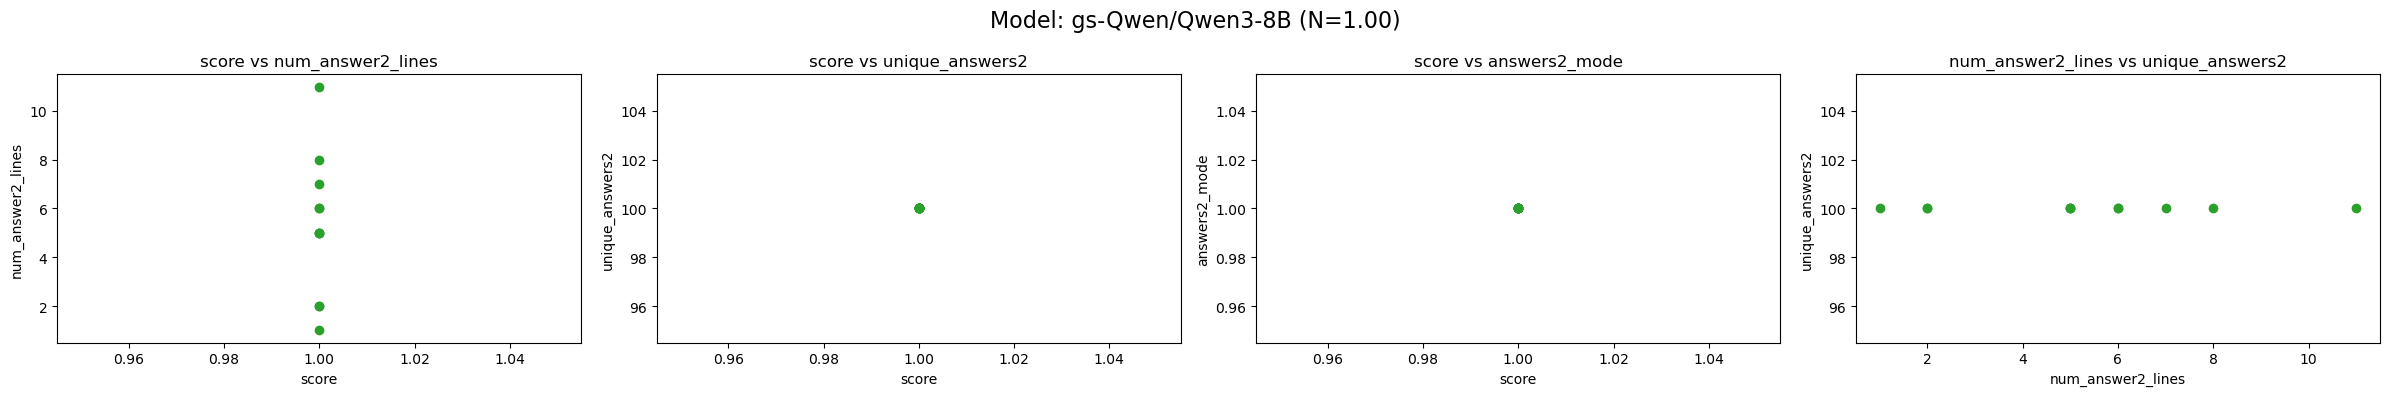

,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2,answers2_mode
0,sharded-HumanEval/99,98,1.000000,182.397959,25.071429,7.346939,170.397959,23.071429,7.346939,145.857143,19.734694,4.734694,23.469388,23.469388,20.408163,0.632653
1,sharded-HumanEval/124,113,0.991150,616.424779,91.920354,22.238938,604.451327,89.929204,22.238938,564.823009,85.106195,18.035398,99.115044,99.115044,96.460177,0.017699
2,sharded-livecodebench/2888,113,0.991150,1057.938053,138.079646,32.336283,1045.938053,136.079646,32.336283,701.442478,86.982301,19.805310,100.000000,100.000000,100.000000,0.008850
3,sharded-HumanEval/88,101,0.990099,207.683168,28.801980,6.722772,195.712871,26.811881,6.722772,143.772277,18.029703,3.594059,34.653465,34.653465,25.742574,0.336634
4,sharded-HumanEval/141,101,0.990099,397.801980,47.089109,13.059406,385.801980,45.089109,13.059406,376.930693,44.297030,10.574257,81.188119,81.188119,78.217822,0.059406
5,sharded-HumanEval/139,100,0.990000,292.660000,42.520000,11.660000,280.660000,40.520000,11.660000,155.530000,21.670000,5.240000,20.000000,20.000000,12.000000,0.840000
6,sharded-livecodebench/2868,99,0.989899,857.080808,96.727273,25.969697,845.080808,94.727273,25.969697,609.404040,63.616162,16.393939,100.000000,100.000000,95.959596,0.030303
7,sharded-HumanEval/26,97,0.989691,178.350515,23.690722,6.432990,166.350515,21.690722,6.432990,157.628866,20.814433,2.690722,23.711340,23.711340,18.556701,0.608247
8,sharded-livecodebench/2785,96,0.989583,612.635417,92.791667,16.760417,600.635417,90.791667,16.760417,316.760417,39.468750,8.489583,100.000000,100.000000,89.583333,0.052083
9,sharded-livecodebench/2791,94,0.989362,589.372340,86.351064,16.148936,577.372340,84.351064,16.148936,391.159574,54.478723,10.000000,97.872340,97.872340,91.489362,0.031915


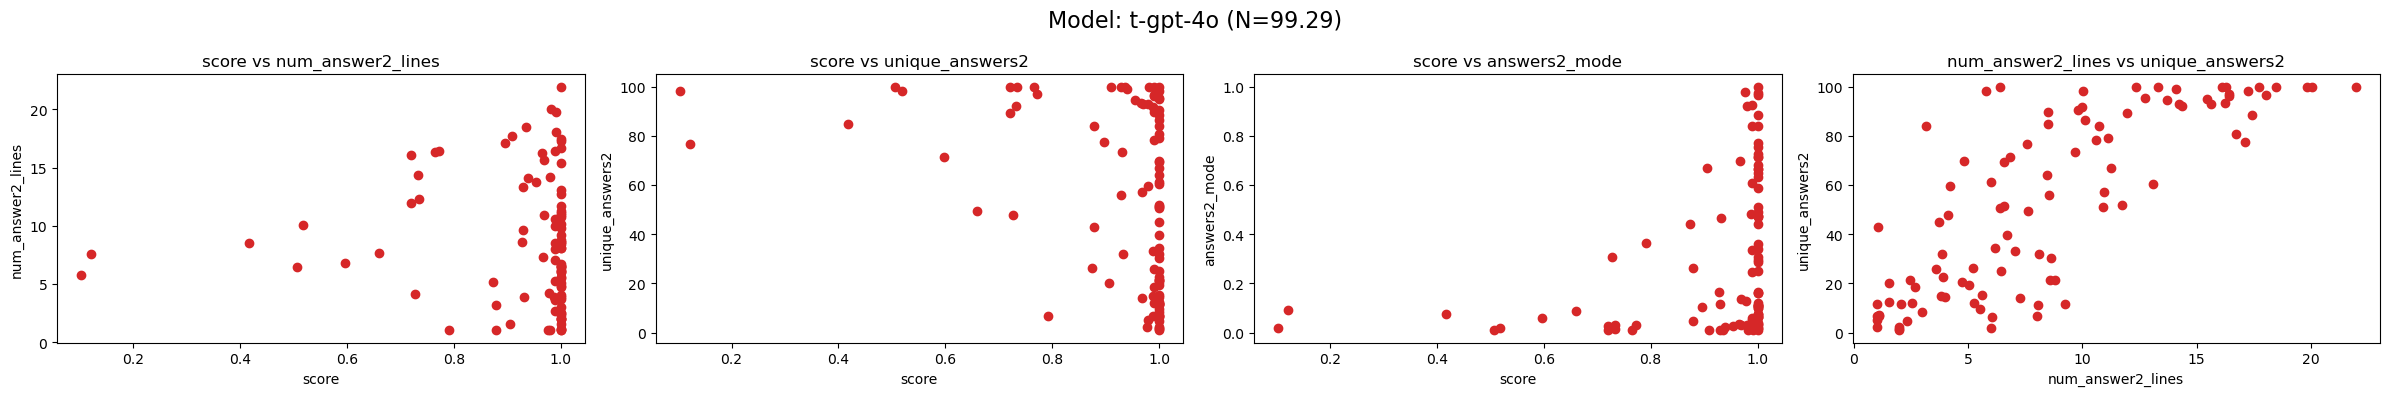

,task_id,N,score,num_response_chars,num_response_words,num_response_lines,num_answer_chars,num_answer_words,num_answer_lines,num_answer2_chars,num_answer2_words,num_answer2_lines,unique_responses,unique_answers,unique_answers2,answers2_mode
0,sharded-livecodebench/2998,175,1.000000,472.731429,60.634286,13.411429,460.731429,58.634286,13.411429,454.628571,57.834286,11.400000,41.142857,41.142857,36.000000,0.188571
1,sharded-HumanEval/26,163,1.000000,411.368098,62.558282,12.975460,399.368098,60.558282,12.975460,203.576687,27.490798,4.251534,5.521472,5.521472,4.907975,0.398773
2,sharded-HumanEval/8,194,1.000000,230.391753,29.000000,10.000000,218.391753,27.000000,10.000000,214.391753,27.000000,6.000000,3.608247,3.608247,3.608247,0.530928
3,sharded-HumanEval/43,159,1.000000,599.798742,80.100629,23.012579,587.798742,78.100629,23.012579,151.798742,19.100629,6.012579,10.691824,10.691824,10.691824,0.823899
4,sharded-HumanEval/128,193,1.000000,708.559585,108.409326,25.896373,696.559585,106.409326,25.896373,329.963731,45.435233,12.917098,37.305699,37.305699,36.787565,0.160622
5,sharded-HumanEval/158,164,1.000000,664.115854,78.432927,19.012195,652.115854,76.432927,19.012195,364.347561,39.225610,11.286585,51.219512,51.219512,37.195122,0.103659
6,sharded-livecodebench/2887,159,1.000000,562.006289,62.270440,17.811321,550.006289,60.270440,17.811321,434.459119,44.226415,12.477987,93.081761,93.081761,45.911950,0.125786
7,sharded-livecodebench/2955,170,1.000000,628.882353,68.223529,15.341176,616.882353,66.223529,15.341176,476.435294,46.917647,9.958824,87.058824,87.058824,52.941176,0.147059
8,sharded-livecodebench/2857,162,1.000000,525.944444,59.160494,15.895062,513.944444,57.160494,15.895062,444.888889,48.098765,12.592593,56.790123,56.790123,12.345679,0.277778
9,sharded-HumanEval/73,154,1.000000,615.500000,98.623377,17.688312,603.500000,96.623377,17.688312,166.370130,26.987013,6.012987,8.441558,8.441558,6.493506,0.318182


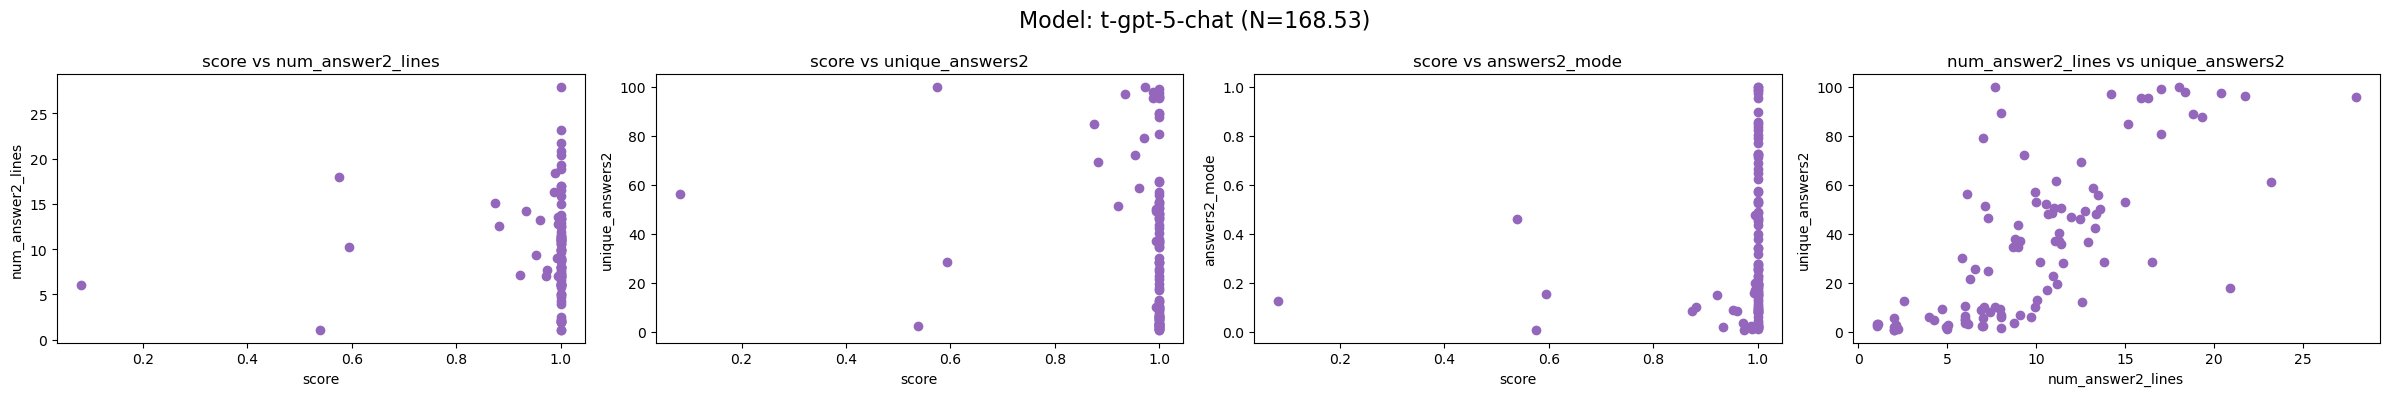

In [27]:
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np, pandas as pd
from collections import Counter

# pd show 200 rows
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
pd.set_option('display.max_rows', 200)
for model_idx, model_name in enumerate(models):
    model_logs = all_logs[model_name]
    keys = ["score", "num_response_chars", "num_response_words", "num_response_lines", "num_answer_chars", "num_answer_words", "num_answer_lines", "num_answer2_chars", "num_answer2_words", "num_answer2_lines"]
    avg_stats = {key: {} for key in keys}
    task_responses, task_answers, task_answers2 = {}, {}, {}
    for log in model_logs:
        task_id = log["task_id"]
        
        for key in keys:
            if task_id not in avg_stats[key]:
                avg_stats[key][task_id] = []
            avg_stats[key][task_id].append(log[key])

        if task_id not in task_responses:
            task_responses[task_id] = []
            task_answers[task_id] = []
            task_answers2[task_id] = []
        task_responses[task_id].append(log["response"])
        task_answers[task_id].append(log["answer"])
        task_answers2[task_id].append(log["answer2"])

    dataset = []
    task_ids = list(avg_stats["score"].keys())
    for task_id in task_ids:
        row = {"task_id": task_id, "N": len(task_responses[task_id])}
        for key in keys:
            row[key] = np.mean(avg_stats[key][task_id])
        responses = task_responses[task_id]
        answers = task_answers[task_id]
        answers2 = task_answers2[task_id]
        row["unique_responses"] = 100.0 * len(set(responses)) / len(responses)
        row["unique_answers"] = 100.0 * len(set(answers)) / len(answers)
        row["unique_answers2"] = 100.0 * len(set(answers2)) / len(answers2)
        answers2_counts = Counter(answers2)
        row["answers2_mode"] = answers2_counts.most_common(1)[0][1] / len(answers2)

        dataset.append(row)

    dataset = sorted(dataset, key=lambda x: x["score"], reverse=True)

    display(pd.DataFrame(dataset[-50:]))

    scores = [row["score"] for row in dataset]
    avg_N = np.mean([row["N"] for row in dataset])
    
    # plot_keys = [k for k in keys + ["unique_responses", "unique_answers", "unique_answers2"] if k != "score"]
    plot_keys = [["score", "num_answer2_lines"], ["score", "unique_answers2"], ["score", "answers2_mode"], ["num_answer2_lines", "unique_answers2"]]
    n_plots = len(plot_keys)
    n_cols = 4
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 4 * n_rows))
    fig.suptitle(f"Model: {model_name} (N={avg_N:.2f})", fontsize=16)
    axes = axes.flatten() if n_plots > 1 else [axes]

    
    for idx, (k_x, k_y) in enumerate(plot_keys):
        values_x = [row[k_x] for row in dataset]
        values_y = [row[k_y] for row in dataset]
        axes[idx].scatter(values_x, values_y, color=colors[model_idx])
        axes[idx].set_xlabel(k_x)
        axes[idx].set_ylabel(k_y)
        axes[idx].set_title(f"{k_x} vs {k_y}")
    
    # Hide any unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
